For our non-linear model, we used Random Forest and we narrowed down to 40 features from our EDA, univariate and regression analysis (correlation and p-values included) as well as common-sense team discussions.   Most of the null values were imputed before this point.  

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline 
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit

housing = pd.read_csv('./housing_fill_drop1.csv', index_col=0)
housing.shape
housing 

PID  GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  \
1    909176150        856     126000          30       RL         59.0   
2    905476230       1049     139500         120       RL         42.0   
3    911128020       1001     124900          30  C (all)         60.0   
4    535377150       1039     114000          70       RL         80.0   
5    534177230       1665     227000          60       RL         70.0   
..         ...        ...        ...         ...      ...          ...   
759  903205040        952     121000          30       RL         56.0   
760  905402060       1733     139600          20       RL         65.0   
761  909275030       2002     145000          90       RH         82.0   
762  907192040       1842     217500          60       RL         70.0   
763  906223180       1911     215000          60       RL         80.0   

     LotArea Street Alley LotShape  ... EnclosedPorch 3SsnPorch ScreenPorch  \
1       7890   Pave   Naa      Reg  ...             0         0         166   
2       4235   Pave   Naa      Reg  ...             0         0           0   
3       6060   Pave   Naa      Reg  ...            42        86           0   
4       8146   Pave   Naa      Reg  ...           168         0         111   
5       8400   Pave   Naa      Reg  ...             0         0           0   
..       ...    ...   ...      ...  ...           ...       ...         ...   
759     8854   Pave   Naa      Reg  ...             0         0          40   
760    13680   Pave   Naa      IR1  ...             0         0           0   
761     6270   Pave   Naa      Reg  ...             0         0           0   
762     8826   Pave   Naa      Reg  ...             0         0           0   
763     9554   Pave   Naa      IR1  ...             0         0           0   

    PoolArea Fence MiscVal MoSold YrSold SaleType  SaleCondition  
1          0    Nf       0      3   2010      WD          Normal  
2          0    Nf       0      2   2009      WD          Normal  
3          0    Nf       0     11   2007      WD          Normal  
4          0    Nf       0      5   2009      WD          Normal  
5          0    Nf       0     11   2009      WD          Normal  
..       ...   ...     ...    ...    ...      ...            ...  
759        0    Nf       0      5   2009      WD          Normal  
760        0    Nf       0      6   2009      WD          Normal  
761        0    Nf       0      8   2007      WD          Normal  
762        0    Nf       0      7   2007      WD          Normal  
763        0    Nf       0      9   2006      WD          Normal  

[2580 rows x 79 columns]

In [2]:
pd.set_option('display.max_rows', housing.shape[0]+1)

housing.isna().sum()

PID               0
GrLivArea         0
SalePrice         0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType       14
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
BsmtFullBath      0
BsmtHalfBath      0


In [3]:
values = {'MasVnrType':'Missing', 'Electrical':'Missing'}

housing = housing.fillna(value=values)
housing.isnull().sum(axis=0)

PID              0
GrLivArea        0
SalePrice        0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr

In [4]:
housing['MSZoning'].dtypes

dtype('O')

In [5]:
housing.shape

(2580, 79)

In [6]:
housing.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

We narrowed down to 40 features from our EDA, univariate and regression analysis (correlation and p-values included) as well as common-sense team discussions. So we progress with those 40 features by dropping the rest here:

In [7]:
# Dropping the columns
housing= housing.drop(["PID","BsmtHalfBath","HalfBath","KitchenAbvGr","BsmtFinSF2","BsmtUnfSF","GarageCars","WoodDeckSF",
                        "OpenPorchSF","EnclosedPorch", "3SsnPorch","ScreenPorch","OverallCond","MSSubClass",
                        "ExterCond" ,"Functional","BsmtCond","BsmtFinType1", "BsmtFinType2","GarageCond","GarageQual",
                         "RoofStyle","RoofMatl","Exterior2nd","MasVnrArea","Utilities","CentralAir",
                        "Fireplaces","PoolArea","Fence","MiscVal","Alley","LandContour",
                        "LotShape", "SaleCondition","SaleType","Condition2","MoSold"], axis=1)

In [8]:
housing.shape
housing.head()

GrLivArea  SalePrice MSZoning  LotFrontage  LotArea Street LotConfig  \
1        856     126000       RL         59.0     7890   Pave    Corner   
2       1049     139500       RL         42.0     4235   Pave    Inside   
3       1001     124900  C (all)         60.0     6060   Pave    Inside   
4       1039     114000       RL         80.0     8146   Pave    Corner   
5       1665     227000       RL         70.0     8400   Pave    Inside   

  LandSlope Neighborhood Condition1  ... BedroomAbvGr KitchenQual  \
1       Gtl        SWISU       Norm  ...            2          TA   
2       Gtl      Edwards       Norm  ...            2          Gd   
3       Gtl       IDOTRR       Norm  ...            2          Gd   
4       Gtl      OldTown       Norm  ...            2          TA   
5       Gtl       NWAmes       Norm  ...            3          Gd   

   TotRmsAbvGrd  FireplaceQu  GarageType GarageYrBlt GarageFinish GarageArea  \
1             4           Gd      Detchd      1939.0          Unf      399.0   
2             5          Nfp      Attchd      1984.0          Fin      266.0   
3             5          Nfp      Detchd      1930.0          Unf      216.0   
4             6          Nfp      Detchd      1940.0          Unf      281.0   
5             6          Nfp      Attchd      2001.0          Fin      528.0   

  PavedDrive YrSold  
1          Y   2010  
2          Y   2009  
3          N   2007  
4          N   2009  
5          Y   2009  

[5 rows x 41 columns]

We separate the categorical features first to encode them before modeling them.  We do 2 types of encoding: label encoding for the features such as Neighborhood and MasVnrType and then Ordinal encoding for the features such as Kitchen Quality and Overall Quality: 

In [9]:
# creating a dataframe of all non numerical/categorical columns.
housing_cat= housing.select_dtypes(include ='object')
housing_cat.shape

(2580, 22)

In [10]:
housing_cat.dtypes

MSZoning        object
Street          object
LotConfig       object
LandSlope       object
Neighborhood    object
Condition1      object
BldgType        object
HouseStyle      object
Exterior1st     object
MasVnrType      object
ExterQual       object
Foundation      object
BsmtQual        object
BsmtExposure    object
Heating         object
HeatingQC       object
Electrical      object
KitchenQual     object
FireplaceQu     object
GarageType      object
GarageFinish    object
PavedDrive      object
dtype: object

In [11]:
housing.select_dtypes(include ='object')

MSZoning Street LotConfig LandSlope Neighborhood Condition1 BldgType  \
1          RL   Pave    Corner       Gtl        SWISU       Norm     1Fam   
2          RL   Pave    Inside       Gtl      Edwards       Norm   TwnhsE   
3     C (all)   Pave    Inside       Gtl       IDOTRR       Norm     1Fam   
4          RL   Pave    Corner       Gtl      OldTown       Norm     1Fam   
5          RL   Pave    Inside       Gtl       NWAmes       Norm     1Fam   
6          RL   Pave    Corner       Gtl      Edwards       Norm     1Fam   
7          RM   Pave    Inside       Mod      OldTown       Norm   2fmCon   
8          RL   Pave    Inside       Gtl      Blmngtn       Norm     1Fam   
9          RL   Pave    Corner       Gtl      Mitchel       Norm     1Fam   
10         RM   Pave    Inside       Gtl      Edwards       Norm   TwnhsE   
11         RL   Pave    Inside       Gtl      NridgHt       Norm   TwnhsE   
12         RL   Pave    Inside       Gtl      Mitchel       Norm     1Fam   
13         RM   Pave    Corner       Gtl      OldTown       Norm     1Fam   
14         RL   Pave    Inside       Gtl        NAmes       Norm     1Fam   
15         RL   Pave    Inside       Gtl      CollgCr       Norm     1Fam   
16         RL   Pave    Inside       Gtl      SawyerW       Norm     1Fam   
17         RL   Pave    Inside       Gtl      CollgCr       Norm     1Fam   
18         RL   Pave    Inside       Gtl      Edwards       Norm     1Fam   
19         RL   Pave    Inside       Gtl       NWAmes       Norm     1Fam   
20         RL   Pave    Inside       Gtl      Mitchel       Norm     1Fam   
21         RL   Pave    Inside       Gtl      SawyerW       Norm     1Fam   
22         RM   Pave    Inside       Gtl      OldTown       Norm     1Fam   
23         RM   Pave    Inside       Gtl      MeadowV       Norm    Twnhs   
24         RM   Pave    Corner       Gtl      OldTown       Norm     1Fam   
25         RM   Pave    Inside       Gtl       BrDale       Norm    Twnhs   
26         RL   Pave    Inside       Gtl      Gilbert       RRAn     1Fam   
27         RL   Pave    Inside       Gtl       Timber       Norm     1Fam   
28         FV   Pave    Inside       Gtl      Somerst       Norm    Twnhs   
29         RL   Pave    Corner       Gtl       NWAmes       PosN     1Fam   
30         RL   Pave    Inside       Gtl      NridgHt       Norm     1Fam   
31         RM   Pave    Inside       Gtl      OldTown     Artery     1Fam   
32         RL   Pave    Inside       Gtl      Gilbert       Norm     1Fam   
33         RL   Pave    Corner       Gtl      Gilbert       Norm     1Fam   
34         RL   Pave    Inside       Gtl      BrkSide       Norm     1Fam   
35         RL   Pave    Inside       Gtl        NAmes       Norm     1Fam   
36         RL   Pave    Corner       Gtl       Timber       Norm     1Fam   
37         RL   Pave    Inside       Gtl      CollgCr       Norm     1Fam   
38         RM   Pave    Inside       Gtl      OldTown       Norm     1Fam   
39         RL   Pave    Inside       Gtl       NWAmes       Norm     1Fam   
40         RL   Pave    Inside       Gtl        NAmes       Norm     1Fam   
41         RL   Pave       FR2       Gtl      NoRidge       Norm     1Fam   
42         RL   Pave    Corner       Gtl      Mitchel       Norm     1Fam   
43         RL   Pave    Corner       Gtl        NAmes       Norm     1Fam   
44         RL   Pave    Inside       Gtl       Sawyer       RRAe     1Fam   
45         RL   Pave    Inside       Gtl      OldTown       Norm     1Fam   
46         RL   Pave    Corner       Gtl      NridgHt       Norm     1Fam   
47         RL   Pave    Inside       Gtl      Gilbert       Norm     1Fam   
48         RL   Pave    Inside       Gtl      Edwards       Norm     1Fam   
49         RM   Pave    Inside       Gtl      OldTown     Artery     1Fam   
50         RM   Pave    Corner       Gtl      OldTown       Norm     1Fam   
51         RL   Pave    Inside       Gtl        SWISU       Norm   Duplex   
5

In [12]:
housing_nominal= housing_cat.drop(["LandSlope", "ExterQual", "BsmtQual", "BsmtExposure", "HeatingQC", "Electrical", "KitchenQual", "FireplaceQu", "GarageFinish", "PavedDrive"], axis=1)
housing_nominal.head()

MSZoning Street LotConfig Neighborhood Condition1 BldgType HouseStyle  \
1       RL   Pave    Corner        SWISU       Norm     1Fam     1Story   
2       RL   Pave    Inside      Edwards       Norm   TwnhsE     1Story   
3  C (all)   Pave    Inside       IDOTRR       Norm     1Fam     1Story   
4       RL   Pave    Corner      OldTown       Norm     1Fam     2Story   
5       RL   Pave    Inside       NWAmes       Norm     1Fam     2Story   

  Exterior1st MasVnrType Foundation Heating GarageType  
1     Wd Sdng       None     CBlock    GasA     Detchd  
2     HdBoard    BrkFace     CBlock    GasA     Attchd  
3     MetalSd       None     BrkTil    GasA     Detchd  
4     MetalSd       None     BrkTil    GasA     Detchd  
5     VinylSd       None      PConc    GasA     Attchd

In [13]:
housing_ordinal= housing_cat.drop(["MSZoning", "Street", "LotConfig", "Neighborhood", "Condition1", "BldgType", "HouseStyle", "Exterior1st", "MasVnrType", "Foundation", "Heating", "GarageType"], axis=1)
housing_ordinal.head()

LandSlope ExterQual BsmtQual BsmtExposure HeatingQC Electrical KitchenQual  \
1       Gtl        TA       TA           No        TA      SBrkr          TA   
2       Gtl        Gd       Gd           Mn        TA      SBrkr          Gd   
3       Gtl        Gd       TA           No        Ex      SBrkr          Gd   
4       Gtl        Gd       Fa           No        Gd      SBrkr          TA   
5       Gtl        Gd       Gd           No        Ex      SBrkr          Gd   

  FireplaceQu GarageFinish PavedDrive  
1          Gd          Unf          Y  
2         Nfp          Fin          Y  
3         Nfp          Unf          N  
4         Nfp          Unf          N  
5         Nfp          Fin          Y

In [14]:
# converting all categorical columns from object type to string in order to prep them for label encoding: 
housing_nominal = housing_nominal.astype(str)

In [15]:
# Label encoding all the NOMINAL columns
labelencoder=LabelEncoder()
categorical = list(housing_nominal.select_dtypes(include=['object']).columns.values)
for cat in categorical:
    housing_nominal[cat]=labelencoder.fit_transform(housing_nominal[cat])
    

In [16]:
 housing_nominal

MSZoning  Street  LotConfig  Neighborhood  Condition1  BldgType  \
1            5       1          0            21           2         0   
2            5       1          4             7           2         4   
3            1       1          4            11           2         0   
4            5       1          0            20           2         0   
5            5       1          4            17           2         0   
6            5       1          0             7           2         0   
7            6       1          4            20           2         1   
8            5       1          4             0           2         0   
9            5       1          0            14           2         0   
10           6       1          4             7           2         4   
11           5       1          4            19           2         4   
12           5       1          4            14           2         0   
13           6       1          0            20           2         0   
14           5       1          4            15           2         0   
15           5       1          4             5           2         0   
16           5       1          4            23           2         0   
17           5       1          4             5           2         0   
18           5       1          4             7           2         0   
19           5       1          4            17           2         0   
20           5       1          4            14           2         0   
21           5       1          4            23           2         0   
22           6       1          4            20           2         0   
23           6       1          4            13           2         3   
24           6       1          0            20           2         0   
25           6       1          4             2           2         3   
26           5       1          4             8           6         0   
27           5       1          4            26           2         0   
28           2       1          4            24           2         3   
29           5       1          0            17           4         0   
30           5       1          4            19           2         0   
31           6       1          4            20           0         0   
32           5       1          4             8           2         0   
33           5       1          0             8           2         0   
34           5       1          4             3           2         0   
35           5       1          4            15           2         0   
36           5       1          0            26           2         0   
37           5       1          4             5           2         0   
38           6       1          4            20           2         0   
39           5       1          4            17           2         0   
40           5       1          4            15           2         0   
41           5       1          2            18           2         0   
42           5       1          0            14           2         0   
43           5       1          0            15           2         0   
44           5       1          4            22           5         0   
45           5       1          4            20           2         0   
46           5       1          0            19           2         0   
47           5       1          4             8           2         0   
48           5       1          4             7           2         0   
49           6       1          4            20           0         0   
50           6       1          0            20           2         0   
51           5       1          4            21           2         2   
52           2       1          4            24           2         4   
53           5       1          4            17           2         0   
54           5       1          2             5           2     

In [17]:
housing_nominal.columns

Index(['MSZoning', 'Street', 'LotConfig', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'Exterior1st', 'MasVnrType', 'Foundation',
       'Heating', 'GarageType'],
      dtype='object')

In [18]:
# Dropping the original columns after encoding
housing= housing.drop(['MSZoning', 'Street', 'LotConfig', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'Exterior1st', 'MasVnrType', 'Foundation',
       'Heating', 'GarageType'], axis=1)

In [19]:
pd.set_option("display.max_columns", None)
housing.head(10)

GrLivArea  SalePrice  LotFrontage  LotArea LandSlope  OverallQual  \
1         856     126000         59.0     7890       Gtl            6   
2        1049     139500         42.0     4235       Gtl            5   
3        1001     124900         60.0     6060       Gtl            5   
4        1039     114000         80.0     8146       Gtl            4   
5        1665     227000         70.0     8400       Gtl            8   
6        1922     198500         64.0     7301       Gtl            7   
7         936      93000         60.0     6000       Mod            4   
8        1246     187687         53.0     3710       Gtl            7   
9         889     137500         74.0    12395       Gtl            5   
10       1072     140000         35.0     3675       Gtl            6   

    YearBuilt  YearRemodAdd ExterQual BsmtQual BsmtExposure  BsmtFinSF1  \
1        1939          1950        TA       TA           No       238.0   
2        1984          1984        Gd       Gd           Mn       552.0   
3        1930          2007        Gd       TA           No       737.0   
4        1900          2003        Gd       Fa           No         0.0   
5        2001          2001        Gd       Gd           No       643.0   
6        2003          2003        Gd       Nb           Nb         0.0   
7        1953          1953        Fa       Fa           No         0.0   
8        2007          2008        Gd       Gd           Gd         0.0   
9        1984          1984        TA       TA           No       647.0   
10       2005          2005        TA       Gd           Gd       467.0   

    TotalBsmtSF HeatingQC Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
1         856.0        TA      SBrkr       856         0             0   
2        1049.0        TA      SBrkr      1049         0             0   
3         837.0        Ex      SBrkr      1001         0             0   
4         405.0        Gd      SBrkr       717       322             0   
5         810.0        Ex      SBrkr       810       855             0   
6           0.0        Ex      SBrkr       495      1427             0   
7         936.0        TA      SBrkr       936         0             0   
8        1146.0        Ex      SBrkr      1246         0             0   
9         864.0        TA      SBrkr       889         0             0   
10        547.0        Ex      SBrkr      1072         0             0   

    BsmtFullBath  FullBath  BedroomAbvGr KitchenQual  TotRmsAbvGrd  \
1            1.0         1             2          TA             4   
2            1.0         2             2          Gd             5   
3            0.0         1             2          Gd             5   
4            0.0         1             2          TA             6   
5            1.0         2             3          Gd             6   
6            0.0         3             4          Gd             7   
7            0.0         1             2          TA             4   
8            0.0         2             2          Gd             5   
9            0.0         1             3          TA             6   
10           1.0         1             2          Gd             5   

   FireplaceQu  GarageYrBlt GarageFinish  GarageArea PavedDrive  YrSold  
1           Gd       1939.0          Unf       399.0          Y    2010  
2          Nfp       1984.0          Fin       266.0          Y    2009  
3          Nfp       1930.0          Unf       216.0          N    2007  
4          Nfp       1940.0          Unf       281.0          N    2009  
5          Nfp       2001.0          Fin       528.0          Y    2009  
6           Ex       2003.0          RFn       672.0          Y    2009  
7          Nfp       1974.0          Unf       576.0          Y    2009  
8           Gd       2007.0          Fin       428.0          Y    2008  
9          Nfp       1984.0          Unf       484.0          Y    2008  
10         Nfp       2005.0          Fin       5

In [20]:
housing_ordinal = housing_ordinal.astype(str)

In [21]:
housing_ordinal

LandSlope ExterQual BsmtQual BsmtExposure HeatingQC Electrical  \
1          Gtl        TA       TA           No        TA      SBrkr   
2          Gtl        Gd       Gd           Mn        TA      SBrkr   
3          Gtl        Gd       TA           No        Ex      SBrkr   
4          Gtl        Gd       Fa           No        Gd      SBrkr   
5          Gtl        Gd       Gd           No        Ex      SBrkr   
6          Gtl        Gd       Nb           Nb        Ex      SBrkr   
7          Mod        Fa       Fa           No        TA      SBrkr   
8          Gtl        Gd       Gd           Gd        Ex      SBrkr   
9          Gtl        TA       TA           No        TA      SBrkr   
10         Gtl        TA       Gd           Gd        Ex      SBrkr   
11         Gtl        Gd       Gd           No        Ex      SBrkr   
12         Gtl        TA       Gd           No        Gd      SBrkr   
13         Gtl        TA       Fa           No        TA      SBrkr   
14         Gtl        TA       Gd           No        Gd      SBrkr   
15         Gtl        Gd       Gd           Av        Ex      SBrkr   
16         Gtl        Gd       Gd           No        Ex      SBrkr   
17         Gtl        Gd       Gd           No        Ex      SBrkr   
18         Gtl        TA       TA           No        TA      FuseF   
19         Gtl        TA       TA           Mn        Gd      SBrkr   
20         Gtl        TA       Gd           Av        Ex      SBrkr   
21         Gtl        Gd       Gd           No        Ex      SBrkr   
22         Gtl        TA       TA           No        Ex      SBrkr   
23         Gtl        TA       TA           No        Ex      SBrkr   
24         Gtl        Gd       TA           No        TA      SBrkr   
25         Gtl        TA       TA           No        TA      SBrkr   
26         Gtl        TA       Gd           No        Ex      SBrkr   
27         Gtl        Gd       Gd           Av        Ex      SBrkr   
28         Gtl        Gd       Gd           No        Ex      SBrkr   
29         Gtl        TA       Gd           Mn        Ex      SBrkr   
30         Gtl        Ex       Ex           Gd        Ex      SBrkr   
31         Gtl        TA       Fa           No        Gd      FuseA   
32         Gtl        Gd       Gd           No        Ex      SBrkr   
33         Gtl        Gd       Gd           No        Ex      SBrkr   
34         Gtl        TA       TA           No        Gd      SBrkr   
35         Gtl        TA       TA           No        TA      FuseA   
36         Gtl        Gd       Gd           No        Ex      SBrkr   
37         Gtl        Gd       Gd           No        Ex      SBrkr   
38         Gtl        TA       Fa           No        TA      SBrkr   
39         Gtl        TA       TA           No        TA      SBrkr   
40         Gtl        TA       TA           No        TA      SBrkr   
41         Gtl        Gd       Ex           Mn        Ex      SBrkr   
42         Gtl        TA       TA           No        TA      SBrkr   
43         Gtl        TA       TA           No        Ex      SBrkr   
44         Gtl        TA       TA           No        Gd      SBrkr   
45         Gtl        TA       Gd           Av        Ex      SBrkr   
46         Gtl        Gd       Ex           Av        Ex      SBrkr   
47         Gtl        Gd       Gd           Av        Ex      SBrkr   
48         Gtl        TA       TA           No        Gd      SBrkr   
49         Gtl        TA       TA           No        TA      SBrkr   
50         Gtl        TA       TA           No        Gd      SBrkr   
51         Gtl        TA       TA           Mn        Fa      FuseA   
52         Gtl        Gd       Gd           No        Ex      SBrkr   
53         Gtl        TA       Gd           No        Ex      SBrkr   
54         Gtl        Gd       Gd           Av        Ex      SBrkr   
55         Gtl        TA       Gd           Gd        TA      SBrkr   
56         Gtl        TA     

In [22]:
# Label encoding all the ORDINAL columns
ordinalencoder= OrdinalEncoder()

housing_ordinal['LandSlope'] = housing_ordinal['LandSlope'].map({'Gtl': 1,
                                  'Mod': 2,
                                  'Sev': 3})
housing_ordinal['ExterQual'] = housing_ordinal['ExterQual'].map({'Po': 1,
                                  'Fa': 2,
                                  'TA': 3,
                                  'Gd': 4,
                                  'Ex': 5})
housing_ordinal['BsmtQual'] = housing_ordinal['BsmtQual'].map({'Nb': 1,
                                  'Po': 2,
                                  'Fa': 3,
                                  'TA': 4,
                                  'Gd': 5,
                                  'Ex': 6})
housing_ordinal['BsmtExposure'] = housing_ordinal['BsmtExposure'].map({'Nb': 1,
                                  'No': 2,
                                  'Mn': 3,
                                  'Av': 4,
                                  'Gd': 5})
housing_ordinal['HeatingQC'] = housing_ordinal['HeatingQC'].map({'Po': 1,
                                  'Fa': 2,
                                  'TA': 3,
                                  'Gd': 4,
                                  'Ex': 5})
housing_ordinal['Electrical'] = housing_ordinal['Electrical'].map({'Missing': 1,
                                  'FuseP': 2,
                                  'FuseF': 3,
                                  'FuseA': 4,
                                  'SBrkr': 5})
housing_ordinal['KitchenQual'] = housing_ordinal['KitchenQual'].map({'Po': 1,
                                  'Fa': 2,
                                  'TA': 3,
                                  'Gd': 4,
                                  'Ex': 5})
housing_ordinal['FireplaceQu'] = housing_ordinal['FireplaceQu'].map({'Nfp': 1,
                                  'Po': 2,
                                  'Fa': 3,
                                  'TA': 4,
                                  'Gd': 5,
                                  'Ex': 6})
housing_ordinal['GarageFinish'] = housing_ordinal['GarageFinish'].map({'Ng': 1,
                                  'Unf': 2,
                                  'RFn': 3,
                                  'Fin': 4})
housing_ordinal['PavedDrive'] = housing_ordinal['PavedDrive'].map({'N': 1,
                                  'P': 2,
                                  'Y': 3})

In [23]:
housing_ordinal

LandSlope  ExterQual  BsmtQual  BsmtExposure  HeatingQC  Electrical  \
1             1          3         4             2          3           5   
2             1          4         5             3          3           5   
3             1          4         4             2          5           5   
4             1          4         3             2          4           5   
5             1          4         5             2          5           5   
6             1          4         1             1          5           5   
7             2          2         3             2          3           5   
8             1          4         5             5          5           5   
9             1          3         4             2          3           5   
10            1          3         5             5          5           5   
11            1          4         5             2          5           5   
12            1          3         5             2          4           5   
13            1          3         3             2          3           5   
14            1          3         5             2          4           5   
15            1          4         5             4          5           5   
16            1          4         5             2          5           5   
17            1          4         5             2          5           5   
18            1          3         4             2          3           3   
19            1          3         4             3          4           5   
20            1          3         5             4          5           5   
21            1          4         5             2          5           5   
22            1          3         4             2          5           5   
23            1          3         4             2          5           5   
24            1          4         4             2          3           5   
25            1          3         4             2          3           5   
26            1          3         5             2          5           5   
27            1          4         5             4          5           5   
28            1          4         5             2          5           5   
29            1          3         5             3          5           5   
30            1          5         6             5          5           5   
31            1          3         3             2          4           4   
32            1          4         5             2          5           5   
33            1          4         5             2          5           5   
34            1          3         4             2          4           5   
35            1          3         4             2          3           4   
36            1          4         5             2          5           5   
37            1          4         5             2          5           5   
38            1          3         3             2          3           5   
39            1          3         4             2          3           5   
40            1          3         4             2          3           5   
41            1          4         6             3          5           5   
42            1          3         4             2          3           5   
43            1          3         4             2          5           5   
44            1          3         4             2          4           5   
45            1          3         5             4          5           5   
46            1          4         6             4          5           5   
47            1          4         5             4          5           5   
48            1          3         4             2          4           5   
49            1          3         4             2          3           5   
50            1          3         4             2          4           5   
51            1          3         4             3          2           4   
52

In [24]:
housing_ordinal.columns

Index(['LandSlope', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'HeatingQC',
       'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageFinish',
       'PavedDrive'],
      dtype='object')

In [25]:
# Dropping the original columns after encoding
housing= housing.drop(['LandSlope', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'HeatingQC',
       'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageFinish',
       'PavedDrive'], axis=1)
housing.head()

GrLivArea  SalePrice  LotFrontage  LotArea  OverallQual  YearBuilt  \
1        856     126000         59.0     7890            6       1939   
2       1049     139500         42.0     4235            5       1984   
3       1001     124900         60.0     6060            5       1930   
4       1039     114000         80.0     8146            4       1900   
5       1665     227000         70.0     8400            8       2001   

   YearRemodAdd  BsmtFinSF1  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
1          1950       238.0        856.0       856         0             0   
2          1984       552.0       1049.0      1049         0             0   
3          2007       737.0        837.0      1001         0             0   
4          2003         0.0        405.0       717       322             0   
5          2001       643.0        810.0       810       855             0   

   BsmtFullBath  FullBath  BedroomAbvGr  TotRmsAbvGrd  GarageYrBlt  \
1           1.0         1             2             4       1939.0   
2           1.0         2             2             5       1984.0   
3           0.0         1             2             5       1930.0   
4           0.0         1             2             6       1940.0   
5           1.0         2             3             6       2001.0   

   GarageArea  YrSold  
1       399.0    2010  
2       266.0    2009  
3       216.0    2007  
4       281.0    2009  
5       528.0    2009

In [26]:
housing_nominal.head()

MSZoning  Street  LotConfig  Neighborhood  Condition1  BldgType  \
1         5       1          0            21           2         0   
2         5       1          4             7           2         4   
3         1       1          4            11           2         0   
4         5       1          0            20           2         0   
5         5       1          4            17           2         0   

   HouseStyle  Exterior1st  MasVnrType  Foundation  Heating  GarageType  
1           2           13           3           1        1           5  
2           2            6           1           1        1           1  
3           2            8           3           0        1           5  
4           5            8           3           0        1           5  
5           5           12           3           2        1           1

In [27]:
housing_ordinal.head()

LandSlope  ExterQual  BsmtQual  BsmtExposure  HeatingQC  Electrical  \
1          1          3         4             2          3           5   
2          1          4         5             3          3           5   
3          1          4         4             2          5           5   
4          1          4         3             2          4           5   
5          1          4         5             2          5           5   

   KitchenQual  FireplaceQu  GarageFinish  PavedDrive  
1            3            5             2           3  
2            4            1             4           3  
3            4            1             2           1  
4            3            1             2           1  
5            4            1             4           3

In [28]:
# joining the numerical and encoded dataframe
housing_encoded= pd.concat([housing, housing_nominal, housing_ordinal], axis=1)
housing_encoded.head()

GrLivArea  SalePrice  LotFrontage  LotArea  OverallQual  YearBuilt  \
1        856     126000         59.0     7890            6       1939   
2       1049     139500         42.0     4235            5       1984   
3       1001     124900         60.0     6060            5       1930   
4       1039     114000         80.0     8146            4       1900   
5       1665     227000         70.0     8400            8       2001   

   YearRemodAdd  BsmtFinSF1  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
1          1950       238.0        856.0       856         0             0   
2          1984       552.0       1049.0      1049         0             0   
3          2007       737.0        837.0      1001         0             0   
4          2003         0.0        405.0       717       322             0   
5          2001       643.0        810.0       810       855             0   

   BsmtFullBath  FullBath  BedroomAbvGr  TotRmsAbvGrd  GarageYrBlt  \
1           1.0         1             2             4       1939.0   
2           1.0         2             2             5       1984.0   
3           0.0         1             2             5       1930.0   
4           0.0         1             2             6       1940.0   
5           1.0         2             3             6       2001.0   

   GarageArea  YrSold  MSZoning  Street  LotConfig  Neighborhood  Condition1  \
1       399.0    2010         5       1          0            21           2   
2       266.0    2009         5       1          4             7           2   
3       216.0    2007         1       1          4            11           2   
4       281.0    2009         5       1          0            20           2   
5       528.0    2009         5       1          4            17           2   

   BldgType  HouseStyle  Exterior1st  MasVnrType  Foundation  Heating  \
1         0           2           13           3           1        1   
2         4           2            6           1           1        1   
3         0           2            8           3           0        1   
4         0           5            8           3           0        1   
5         0           5           12           3           2        1   

   GarageType  LandSlope  ExterQual  BsmtQual  BsmtExposure  HeatingQC  \
1           5          1          3         4             2          3   
2           1          1          4         5             3          3   
3           5          1          4         4             2          5   
4           5          1          4         3             2          4   
5           1          1          4         5             2          5   

   Electrical  KitchenQual  FireplaceQu  GarageFinish  PavedDrive  
1           5            3            5             2           3  
2           5            4            1             4           3  
3           5            4            1             2           1  
4           5            3            1             2           1  
5           5            4            1             4           3

In [29]:
housing_encoded.shape

(2580, 41)

In [30]:
housing_encoded.columns

Index(['GrLivArea', 'SalePrice', 'LotFrontage', 'LotArea', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'YrSold', 'MSZoning',
       'Street', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'Exterior1st', 'MasVnrType', 'Foundation', 'Heating',
       'GarageType', 'LandSlope', 'ExterQual', 'BsmtQual', 'BsmtExposure',
       'HeatingQC', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageFinish',
       'PavedDrive'],
      dtype='object')

In [31]:
target = housing_encoded[['SalePrice']]
target.head()

SalePrice
1     126000
2     139500
3     124900
4     114000
5     227000

In [32]:
features = housing_encoded.drop(['SalePrice'], axis=1)
features.head()

GrLivArea  LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  \
1        856         59.0     7890            6       1939          1950   
2       1049         42.0     4235            5       1984          1984   
3       1001         60.0     6060            5       1930          2007   
4       1039         80.0     8146            4       1900          2003   
5       1665         70.0     8400            8       2001          2001   

   BsmtFinSF1  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  \
1       238.0        856.0       856         0             0           1.0   
2       552.0       1049.0      1049         0             0           1.0   
3       737.0        837.0      1001         0             0           0.0   
4         0.0        405.0       717       322             0           0.0   
5       643.0        810.0       810       855             0           1.0   

   FullBath  BedroomAbvGr  TotRmsAbvGrd  GarageYrBlt  GarageArea  YrSold  \
1         1             2             4       1939.0       399.0    2010   
2         2             2             5       1984.0       266.0    2009   
3         1             2             5       1930.0       216.0    2007   
4         1             2             6       1940.0       281.0    2009   
5         2             3             6       2001.0       528.0    2009   

   MSZoning  Street  LotConfig  Neighborhood  Condition1  BldgType  \
1         5       1          0            21           2         0   
2         5       1          4             7           2         4   
3         1       1          4            11           2         0   
4         5       1          0            20           2         0   
5         5       1          4            17           2         0   

   HouseStyle  Exterior1st  MasVnrType  Foundation  Heating  GarageType  \
1           2           13           3           1        1           5   
2           2            6           1           1        1           1   
3           2            8           3           0        1           5   
4           5            8           3           0        1           5   
5           5           12           3           2        1           1   

   LandSlope  ExterQual  BsmtQual  BsmtExposure  HeatingQC  Electrical  \
1          1          3         4             2          3           5   
2          1          4         5             3          3           5   
3          1          4         4             2          5           5   
4          1          4         3             2          4           5   
5          1          4         5             2          5           5   

   KitchenQual  FireplaceQu  GarageFinish  PavedDrive  
1            3            5             2           3  
2            4            1             4           3  
3            4            1             2           1  
4            3            1             2           1  
5            4            1             4           3

Here we read-in the indices for the test dataset - this was done because we wanted to compare our models on the exact same test dataset to compare model performance to see which model was best:

In [33]:
test_idx = pd.read_csv('./data/testIndices.csv', index_col=0) 
test_idx.shape
test_idx 

0
0    1476
1     516
2    2444
3    1719
4    2457
5     264
6    2333
7     222
8     313
9    1848
10   2114
11   1209
12   2306
13    464
14    954
15   2537
16   2571
17   1745
18   2345
19   2372
20   1614
21    849
22   2405
23   1531
24    857
25   1904
26    348
27    138
28    552
29    477
30     73
31     49
32    432
33   1166
34   2140
35     63
36   1828
37    113
38   2089
39   2123
40     19
41    103
42   1578
43   1902
44   1047
45    692
46    457
47    364
48   1182
49     61
50   1806
51    281
52     80
53   1782
54    924
55   1394
56    287
57    355
58   1091
59    929
60   1841
61   2440
62   1456
63    478
64   1704
65    628
66    342
67   1316
68    959
69   1237
70   1268
71   2174
72    599
73   1487
74   2142
75   2265
76    785
77    587
78   1714
79   2294
80   1249
81    185
82   2500
83   1441
84   1468
85    910
86   1853
87   2417
88   1420
89   1710
90    531
91   1026
92   1590
93   1821
94   1859
95   1201
96   2176
97    132
98   2032
99    241
100  2047
101   678
102  1921
103  1807
104   266
105  2396
106  1266
107  1740
108  1880
109   205
110  2156
111  1388
112  1649
113  2356
114  1354
115   811
116  2235
117   112
118  1871
119  1604
120  1357
121  1340
122  1005
123  1073
124  2481
125  1556
126  2237
127   585
128   210
129  2199
130   365
131  1986
132   141
133  1156
134  2183
135  1960
136  1757
137   172
138  1064
139   369
140  1993
141   237
142  1638
143  2327
144   973
145  2530
146   750
147  1229
148  2491
149  1697
150    15
151  1544
152  1232
153   828
154  2454
155   274
156   143
157  2060
158    85
159  1861
160   231
161  1294
162  1835
163  1849
164  2448
165   511
166  2323
167  1965
168  2439
169  1333
170  1480
171  2411
172  2008
173  2125
174  1172
175  1273
176  1262
177  2575
178   672
179  1344
180  2271
181  1908
182   361
183  1343
184     5
185  2084
186  1887
187  1007
188    99
189  1875
190   887
191    94
192  2065
193   935
194    38
195   279
196  2161
197  1248
198  1622
199  1732
200    69
201   962
202  2370
203  1984
204  1650
205  1224
206  1541
207  1752
208  2187
209  2049
210  1668
211   787
212   427
213    70
214  2511
215   649
216   847
217  2305
218   607
219  1626
220  1032
221  1495
222  2505
223  1143
224  1781
225  2023
226  2330
227  1654
228  2041
229  1810
230  1312
231  2045
232  1527
233  1395
234   770
235   957
236  1162
237  1469
238   955
239  1894
240  1799
241   195
242  2166
243  2516
244  2014
245   102
246  1889
247   542
248  1314
249   647
250  1305
251  1105
252  2191
253  1987
254  1942
255    96
256  1449
257   875
258  1238
259  1792
260  1771
261   233
262  1471
263  2277
264  1930
265  2259
266   904
267  1554
268  1109
269   841
270   131
271  1797
272  1817
273  2410
274  2328
275   200
276  2538
277   530
278  1336
279  2217
280  1303
281  1569
282   958
283  1439
284   918
285    77
286   363
287  1858
288  2254
289  2400
290   620
291  1920
292   991
293   601
294  2335
295   104
296   817
297  2307
298  1811
299  2451
300   646
301  1932
302  1253
303   982
304  1750
305   111
306   912
307  1749
308  1360
309  2073
310   489
311  2017
312  1615
313   837
314  1442
315    64
316   616
317  2358
318    83
319  2295
320  1659
321   577
322  1216
323  1501
324   356
325   650
326  1558
327  2380
328   666
329  1311
330  1913
331  1126
332  1175
333   557
334    55
335  2010
336  2055
337  1521
338  2554
339  1102
340  1831
341  1396
342   917
343  1939
344   869
345   130
346  2245
347  1552
348   217
349  1381
350  2228
351   527
352  1592
353  2492
354   644
355  2508
356  1973
357  1477
358  1995
359  2324
360   324
361  2556
362  2283
363   242
364  2459
365   978
366  1293
367   495
368  1954
369  1269
370  1063
371   357
372   512
373  2315
374  2393
375  2211
376   502
377   158
378  2274
379   967
380   504
381  2525
382   538
383  2129
384   181
385   350
386   612
387  1692
388  1177
389  2013
390  1731
391   970
392   330
393  1009
394   345
395   260
396  1301
397   219
398   505
399  202

In [34]:
test_idx = np.array(test_idx.iloc[:,0])
type(test_idx)

numpy.ndarray

In [35]:
indices = list(range(len(target.index)))
type(indices)

list

In [36]:
len(indices)

2580

In [37]:
train_idx = list(set(indices) - set(test_idx))
train_idx

[0,
 1,
 2,
 3,
 4,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 16,
 17,
 18,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 50,
 51,
 52,
 53,
 54,
 56,
 57,
 58,
 59,
 60,
 62,
 65,
 66,
 67,
 68,
 71,
 74,
 75,
 76,
 78,
 79,
 81,
 82,
 84,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 95,
 97,
 98,
 100,
 101,
 105,
 106,
 107,
 108,
 109,
 110,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 125,
 126,
 127,
 128,
 129,
 133,
 134,
 135,
 136,
 137,
 139,
 140,
 142,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 182,
 183,
 184,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 196,
 197,
 198,
 199,
 202,
 203,
 204,
 206,
 207,
 208,
 209,
 211,
 212,
 213,
 214,
 215,
 216,
 218,
 220,
 221,
 223,
 224,
 225,
 226,
 22

In [38]:
len(train_idx)

2064

In [39]:
2580*.8

2064.0

In [40]:
target.shape

(2580, 1)

In [41]:
# The indices was passed based on a 80-20 split.  

x_train = features.iloc[train_idx]
x_test = features.iloc[test_idx]
y_train = target.iloc[train_idx]
y_test = target.iloc[test_idx]

In [42]:
len(y_test)

516

We start modeling Random Forest and check the score first to set a baseline before gridsearch

In [43]:
# (1)
from sklearn.ensemble import RandomForestRegressor
randomForest = RandomForestRegressor()

# fit RF model on training set 
randomForest.set_params(random_state=0)
randomForest.fit(x_train, np.ravel(y_train)) 

RandomForestRegressor(random_state=0)

In [44]:
randomForest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [45]:
print("The training R2 is: %.5f" % (randomForest.score(x_train, y_train)))
print("The test R2 is: %.5f" % (randomForest.score(x_test, y_test)))

The training R2 is: 0.98715
The test R2 is: 0.84646


In [46]:
#Predicted Price from test dataset w.r.t Random Forest Regression
y_predict = randomForest.predict((x_test))

#Model Evaluation using R2 for Random Forest Regression
from sklearn import metrics
R2 = metrics.r2_score(y_test, y_predict)
print('R2 associated with Random Forest Regression is:', R2) 


R2 associated with Random Forest Regression is: 0.8464645255617742


In [47]:
y_predict

array([166918.55      , 100920.41      , 168116.9       , 155352.75      ,
       107789.38      , 176782.03      , 129868.        , 146634.5       ,
       181468.25      , 194767.75      , 168154.96      , 215293.79      ,
       137211.63      , 126929.76      , 166951.07      , 216485.29      ,
       129666.49      , 230010.25      , 120181.58      , 241569.59      ,
       198454.        , 129577.7       , 199645.78      , 250317.5       ,
       171412.82      , 143546.32      , 164803.75666667, 169076.44      ,
       142397.41      , 235451.5       , 289314.01      , 122154.48      ,
       265592.63      ,  90172.        , 168466.89      , 458766.35      ,
       149726.5       , 261207.89      , 218639.49      , 185094.56      ,
       143353.91      , 533148.44      , 108029.5       , 102689.29      ,
       293837.1       , 112552.        , 110724.54      , 151934.04      ,
       150174.25      , 150452.96      , 173115.35      , 141123.14      ,
       162600.5       , 2

In [48]:
list(range(100, 500, 100))

[100, 200, 300, 400]

Hyperparameter tuning starts with GridSearch here - we go 6 gridsearches

In [49]:
# 1st GridSearch 
# set the parameter grid
grid_para_forest = {
    'criterion': ['mse'], 
    'max_depth': list(range(2, 12, 3)), # 2 to the power of 12 = 4096 obs. We have 2580 obs. so we chose range of (2,12)
    'n_estimators': list(range(100, 500, 100)), # give enough range to move about to get a feel 
    'bootstrap':[True] # introduce extra random samples of dataset.  
}

In [50]:
# run the RF regressor through the grid search 
grid_search_forest = ms.GridSearchCV(
    randomForest, grid_para_forest, cv=5, n_jobs=-1, return_train_score=True)
%time grid_search_forest.fit(x_train, np.ravel(y_train))   # %time     is ipython magic command to measure the execution time

Wall time: 46.8 s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['mse'],
                         'max_depth': [2, 5, 8, 11],
                         'n_estimators': [100, 200, 300, 400]},
             return_train_score=True)

In [51]:
# get the best parameters
grid_search_forest.best_params_

#{'bootstrap': True, 'criterion': 'mse', 'max_depth': 11, 'n_estimators': 100}

{'bootstrap': True, 'criterion': 'mse', 'max_depth': 11, 'n_estimators': 400}

In [52]:
# get the best score
grid_search_forest.best_score_


0.9014557174136119

In [53]:
round(0.9014557174136119, 5)

0.90146

In [54]:
grid_search_forest.cv_results_

{'mean_fit_time': array([0.59174256, 1.35817146, 1.74221148, 2.64057994, 1.08134694,
        2.27194128, 3.26482534, 4.33583612, 1.64604006, 3.52541924,
        4.77361569, 6.82772861, 2.10506253, 4.54079795, 6.55573058,
        7.54443173]),
 'std_fit_time': array([0.0881958 , 0.20496252, 0.31097893, 0.41043042, 0.13961489,
        0.09830448, 0.22360209, 0.31135624, 0.12707808, 0.17702771,
        0.23909658, 0.40157356, 0.12133965, 0.29828379, 0.33709722,
        0.48989262]),
 'mean_score_time': array([0.01810212, 0.03979979, 0.04259949, 0.05560017, 0.01790681,
        0.03600092, 0.0474174 , 0.0622005 , 0.02090182, 0.04240065,
        0.05819983, 0.07579989, 0.02459836, 0.04459963, 0.0679997 ,
        0.05500236]),
 'std_score_time': array([0.00531387, 0.00649391, 0.00835669, 0.00546162, 0.00174792,
        0.00740246, 0.00419605, 0.00416775, 0.00319923, 0.00392956,
        0.00495635, 0.00915159, 0.00407882, 0.00546236, 0.00948696,
        0.00927567]),
 'param_bootstrap': masked

In [55]:
# get the training/test scores
print("The R2 training is: %.5f" % (grid_search_forest.best_estimator_.score(x_train, y_train))) 
print("The R2 test     is: %.5f" % (grid_search_forest.best_estimator_.score(x_test, y_test)))

# WITHOUT GRID SEARCH
# The training R2 is: 0.98715
# The test R2 is: 0.84646

# AFTER 1st GRID SEARCH
# The R2 training is: 0.98309
# The R2 test     is: 0.85026

The R2 training is: 0.98309
The R2 test     is: 0.85026


In [56]:
# (3)What's the first 5 important features? Again please plot the sorted feature scores by barh
tree_final = grid_search_forest.best_estimator_
feature_importance = list(zip(x_train.columns, tree_final.feature_importances_))
sorted(feature_importance, key=lambda imp: imp[1], reverse=True)

[('OverallQual', 0.5738217445134125),
 ('GrLivArea', 0.14642810004673965),
 ('TotalBsmtSF', 0.05103440728549275),
 ('1stFlrSF', 0.05031039292053182),
 ('GarageArea', 0.03449880115835753),
 ('BsmtFinSF1', 0.02522768561998335),
 ('LotArea', 0.014666750085778403),
 ('YearBuilt', 0.010244996082054808),
 ('YearRemodAdd', 0.00874632961933703),
 ('FullBath', 0.008033141342959377),
 ('BsmtQual', 0.007583951833276452),
 ('LotFrontage', 0.0065299610967300475),
 ('GarageYrBlt', 0.006250379487183145),
 ('KitchenQual', 0.00589303015561711),
 ('2ndFlrSF', 0.005788190113445323),
 ('Neighborhood', 0.004977027130651151),
 ('ExterQual', 0.004380576353684728),
 ('MSZoning', 0.003815571725553081),
 ('FireplaceQu', 0.0034652085233637738),
 ('TotRmsAbvGrd', 0.0030187702608578874),
 ('BsmtFullBath', 0.0029771654241871107),
 ('BsmtExposure', 0.002961137178076271),
 ('GarageType', 0.0029190169213134413),
 ('GarageFinish', 0.0023859471496160043),
 ('Exterior1st', 0.002162744739081953),
 ('BedroomAbvGr', 0.00187

<BarContainer object of 40 artists>

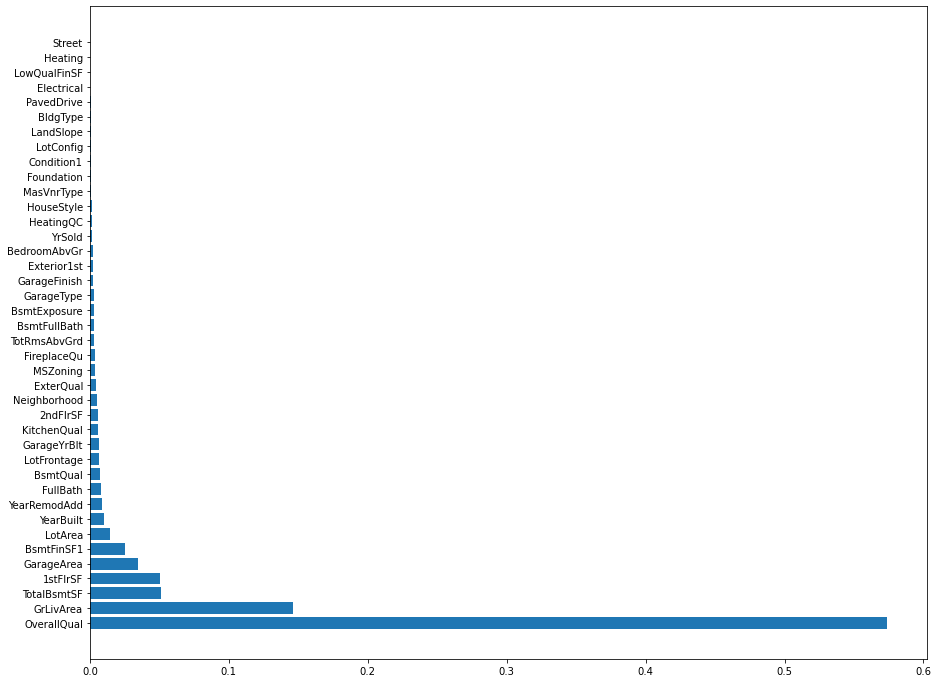

In [57]:
features, importance = zip(*sorted(feature_importance, key=lambda imp: imp[1], reverse=True))
plt.figure(figsize=(15,12))
plt.barh(features, importance)

In [58]:
# 2nd GridSearch 
# set the parameter grid
grid_para_forest = {
    'criterion': ['mse'], 
    'max_depth': [11], #use min_samples_split instead of setting value to max_depth 
    'n_estimators': [300, 350, 400, 450, 500], #   
    'bootstrap':[True],
    'max_features': [2,6,15,30]   #changed from default of 40 in 1st GridSearch to this.  BEAT TO DEATH 1st 
}

# {'bootstrap': True, 'criterion': 'mse', 'max_depth': 11, 'n_estimators': 400}

# use min_samples_split instead of setting value to max_depth. Because 1st GridSearch best_param for max_depth = 11. 
# no need to venture further than 11 because our # of observation is 2580 (2 to the power of (11-12))
# NEXT UP 'min_samples_split': [2, 12, 25, 37 ,50] in place of max_depth

In [59]:
# run the RF regressor through the grid search 
grid_search_forest = ms.GridSearchCV(
    randomForest, grid_para_forest, cv=5, n_jobs=-1, return_train_score=True)
%time grid_search_forest.fit(x_train, np.ravel(y_train))   # %time     is ipython magic command to measure the execution time

Wall time: 57.7 s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['mse'],
                         'max_depth': [11], 'max_features': [2, 6, 15, 30],
                         'n_estimators': [300, 350, 400, 450, 500]},
             return_train_score=True)

In [60]:
# get the best parameters
grid_search_forest.best_params_

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 11,
 'max_features': 15,
 'n_estimators': 450}

In [61]:
# get the best score
grid_search_forest.best_score_

# 1st grid score: 0.9014557174136119

0.9080486893885352

In [62]:
round(0.9080486893885352,5)

0.90805

In [63]:
# get the training/test scores
print("The R2 training is: %.5f" % (grid_search_forest.best_estimator_.score(x_train, y_train))) 
print("The R2 test     is: %.5f" % (grid_search_forest.best_estimator_.score(x_test, y_test)))

# WITHOUT GRID SEARCH
# The training R2 is: 0.98715
# The test R2 is: 0.84646

# AFTER 1st GRID SEARCH
# The R2 training is: 0.98309
# The R2 test     is: 0.85026

# AFTER 2nd GRID SEARCH
# The R2 training is: 0.98305
# The R2 test     is: 0.86154


The R2 training is: 0.98305
The R2 test     is: 0.86154


In [64]:
# 3rd GridSearch 
# set the parameter grid
grid_para_forest = {
    'criterion': ['mse'], 
    'max_depth' : [11], 
    'n_estimators': [450], # previous: n_estimators': [300, 350, 400, 450, 500]. next:[410, 430, 450, 470, 490]
    'bootstrap':[True],
    'max_features': [7,11,15,19,23] # previous: 'max_features': [2,6,15,30] 
}  

# {'bootstrap': True,
#  'criterion': 'mse',
#  'max_depth': 11,
#  'max_features': 15,
#  'n_estimators': 450}

In [65]:
# run the RF regressor through the grid search 
grid_search_forest = ms.GridSearchCV(
    randomForest, grid_para_forest, cv=5, n_jobs=-1, return_train_score=True)
%time grid_search_forest.fit(x_train, np.ravel(y_train))   # %time     is ipython magic command to measure the execution time

Wall time: 20.4 s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['mse'],
                         'max_depth': [11], 'max_features': [7, 11, 15, 19, 23],
                         'n_estimators': [450]},
             return_train_score=True)

In [66]:
# get the best parameters
grid_search_forest.best_params_

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 11,
 'max_features': 11,
 'n_estimators': 450}

In [67]:
# get the best score
grid_search_forest.best_score_

# 2nd grid best score: 0.9080486893885352

0.9081720523243746

In [68]:
round(0.9081720523243746, 5)

0.90817

In [69]:
# get the training/test scores
print("The R2 training is: %.5f" % (grid_search_forest.best_estimator_.score(x_train, y_train))) 
print("The R2 test     is: %.5f" % (grid_search_forest.best_estimator_.score(x_test, y_test)))

# WITHOUT GRID SEARCH
# The training R2 is: 0.98715
# The test R2 is: 0.84646

# AFTER 1st GRID SEARCH
# The R2 training is: 0.98309
# The R2 test     is: 0.85026

# AFTER 2nd GRID SEARCH
# The R2 training is: 0.98305
# The R2 test     is: 0.86154

# AFTER 3rd GRID SEARCH
# The R2 training is: 0.98217
# The R2 test     is: 0.86180

The R2 training is: 0.98217
The R2 test     is: 0.86180


In [70]:
# 4th GridSearch 
# set the parameter grid
grid_para_forest = {
    'criterion': ['mse'], 
    'max_depth' : [11], 
    'n_estimators': [450], # previous: n_estimators': [300, 350, 400, 450, 500]. next:[410, 430, 450, 470, 490]
    'bootstrap':[True],
    'max_features': [7, 9, 11, 13, 15]  # 3rd Grid:[20, 25, 30, 35]
}  

# previous:
# {'bootstrap': True,
#  'criterion': 'mse',
#  'max_depth': 11,
#  'max_features': 11,
#  'n_estimators': 450}

In [71]:
# run the RF regressor through the grid search 
grid_search_forest = ms.GridSearchCV(
    randomForest, grid_para_forest, cv=5, n_jobs=-1, return_train_score=True)
%time grid_search_forest.fit(x_train, np.ravel(y_train))   # %time     is ipython magic command to measure the execution time

Wall time: 17.4 s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['mse'],
                         'max_depth': [11], 'max_features': [7, 9, 11, 13, 15],
                         'n_estimators': [450]},
             return_train_score=True)

In [72]:
# get the best parameters
grid_search_forest.best_params_

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 11,
 'max_features': 13,
 'n_estimators': 450}

In [73]:
# get the best score
grid_search_forest.best_score_

# 3rd grid best score: 0.9081720523243746

0.9086613663293404

In [74]:
round(0.9086613663293404,5)

0.90866

In [75]:
# get the training/test scores
print("The R2 training is: %.5f" % (grid_search_forest.best_estimator_.score(x_train, y_train))) 
print("The R2 test     is: %.5f" % (grid_search_forest.best_estimator_.score(x_test, y_test)))


# WITHOUT GRID SEARCH
# The training R2 is: 0.98715
# The test R2 is: 0.84646

# AFTER 1st GRID SEARCH
# The R2 training is: 0.98309
# The R2 test     is: 0.85026

# AFTER 2nd GRID SEARCH
# The R2 training is: 0.98305
# The R2 test     is: 0.86154

# AFTER 3rd GRID SEARCH
# The R2 training is: 0.98217
# The R2 test     is: 0.86180

# AFTER 4th GRID SEARCH - No score improvement so we have found the optimal to be 'max_features': 20
# The R2 training is: 0.98237
# The R2 test     is: 0.86217


The R2 training is: 0.98237
The R2 test     is: 0.86217


In [76]:
# 5th GridSearch 
# set the parameter grid
grid_para_forest = {
    'criterion': ['mse'], 
    'max_depth' : [11], 
    'n_estimators': [450], # previous: n_estimators': [300, 350, 400, 450, 500]. next:[410, 430, 450, 470, 490]
    'bootstrap':[True],
    'max_features': [12, 13, 14]  # 3rd Grid:[20, 25, 30, 35]
}   

#The 5th GridSearch best_param for min_samples_split returned 14 resulted in better test R2.  so we want to go to 14 

In [77]:
# run the RF regressor through the grid search 
grid_search_forest = ms.GridSearchCV(
    randomForest, grid_para_forest, cv=5, n_jobs=-1, return_train_score=True)
%time grid_search_forest.fit(x_train, np.ravel(y_train))   # %time     is ipython magic command to measure the execution time

Wall time: 11.9 s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['mse'],
                         'max_depth': [11], 'max_features': [12, 13, 14],
                         'n_estimators': [450]},
             return_train_score=True)

In [78]:
# get the best parameters
grid_search_forest.best_params_


{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 11,
 'max_features': 14,
 'n_estimators': 450}

In [79]:
# get the best score
grid_search_forest.best_score_

# 4th grid best score: 0.9086613663293404

0.9087215330963019

In [80]:
round(0.9087215330963019,5)

0.90872

In [81]:
# get the training/test scores
print("The R2 training is: %.5f" % (grid_search_forest.best_estimator_.score(x_train, y_train))) 
print("The R2 test     is: %.5f" % (grid_search_forest.best_estimator_.score(x_test, y_test)))

# WITHOUT GRID SEARCH
# The training R2 is: 0.98715
# The test R2 is: 0.84646

# AFTER 1st GRID SEARCH
# The R2 training is: 0.98309
# The R2 test     is: 0.85026

# AFTER 2nd GRID SEARCH
# The R2 training is: 0.98305
# The R2 test     is: 0.86154

# AFTER 3rd GRID SEARCH
# The R2 training is: 0.98217
# The R2 test     is: 0.86180

# AFTER 4th GRID SEARCH - No score improvement so we have found the optimal to be 'max_features': 20
# The R2 training is: 0.98237
# The R2 test     is: 0.86217

# AFTER 5th GRID SEARCH
# The R2 training is: 0.98273
# The R2 test     is: 0.86338


The R2 training is: 0.98273
The R2 test     is: 0.86338


***************************************************************

In [82]:
# 6th GridSearch 
# set the parameter grid
grid_para_forest = {
    'criterion': ['mse'], 
    'max_depth' : [11], 
    'n_estimators': [410, 430, 450, 470, 490], # previous: n_estimators': [300, 350, 400, 450, 500].
    'bootstrap':[True],
    'max_features': [14]  # 3rd Grid:[20, 25, 30, 35]
}   

#The 5th GridSearch best_param for min_samples_split returned 14 resulted in better test R2.  so we want to go to 14 

In [83]:
# run the RF regressor through the grid search 
grid_search_forest = ms.GridSearchCV(
    randomForest, grid_para_forest, cv=5, n_jobs=-1, return_train_score=True)
%time grid_search_forest.fit(x_train, np.ravel(y_train))   # %time     is ipython magic command to measure the execution time

Wall time: 20.5 s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['mse'],
                         'max_depth': [11], 'max_features': [14],
                         'n_estimators': [410, 430, 450, 470, 490]},
             return_train_score=True)

In [84]:
# get the best parameters
grid_search_forest.best_params_


{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 11,
 'max_features': 14,
 'n_estimators': 490}

In [85]:
# get the best score
grid_search_forest.best_score_

# 5th grid best score: 0.9087215330963019

0.9087565804919022

In [86]:
round(0.9087565804919022,5)

0.90876

In [87]:
# get the training/test scores
print("The R2 training is: %.5f" % (grid_search_forest.best_estimator_.score(x_train, y_train))) 
print("The R2 test     is: %.5f" % (grid_search_forest.best_estimator_.score(x_test, y_test)))

# WITHOUT GRID SEARCH
# The training R2 is: 0.98715
# The test R2 is: 0.84646

# AFTER 1st GRID SEARCH
# The R2 training is: 0.98309
# The R2 test     is: 0.85026

# AFTER 2nd GRID SEARCH
# The R2 training is: 0.98305
# The R2 test     is: 0.86154

# AFTER 3rd GRID SEARCH
# The R2 training is: 0.98217
# The R2 test     is: 0.86180

# AFTER 4th GRID SEARCH - No score improvement so we have found the optimal to be 'max_features': 20
# The R2 training is: 0.98237
# The R2 test     is: 0.86217

# AFTER 5th GRID SEARCH
# The R2 training is: 0.98273
# The R2 test     is: 0.86338

#AFTER 6th GRID SEARCH
# The R2 training is: 0.98275
# The R2 test     is: 0.86345

The R2 training is: 0.98275
The R2 test     is: 0.86345


In [88]:
# 7th GridSearch 
# set the parameter grid
grid_para_forest = {
    'bootstrap': [True],
     'criterion': ['mse'],
     'max_depth': [11],
     'max_features': [14],
     'n_estimators': [490]}



In [89]:
# run the RF regressor through the grid search 
grid_search_forest = ms.GridSearchCV(
    randomForest, grid_para_forest, cv=5, n_jobs=-1, return_train_score=True)
%time grid_search_forest.fit(x_train, np.ravel(y_train))   # %time     is ipython magic command to measure the execution time

Wall time: 7.14 s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['mse'],
                         'max_depth': [11], 'max_features': [14],
                         'n_estimators': [490]},
             return_train_score=True)

In [90]:
# get the best parameters
grid_search_forest.best_params_


{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 11,
 'max_features': 14,
 'n_estimators': 490}

In [91]:
# get the best score
grid_search_forest.best_score_

#6th best score: 0.9087565804919022

0.9087565804919022

In [92]:
# get the training/test scores
print("The R2 training is: %.5f" % (grid_search_forest.best_estimator_.score(x_train, y_train))) 
print("The R2 test     is: %.5f" % (grid_search_forest.best_estimator_.score(x_test, y_test)))

# WITHOUT GRID SEARCH
# The training R2 is: 0.98715
# The test R2 is: 0.84646

# AFTER 1st GRID SEARCH
# The R2 training is: 0.98309
# The R2 test     is: 0.85026

# AFTER 2nd GRID SEARCH
# The R2 training is: 0.98305
# The R2 test     is: 0.86154

# AFTER 3rd GRID SEARCH
# The R2 training is: 0.98217
# The R2 test     is: 0.86180

# AFTER 4th GRID SEARCH - No score improvement so we have found the optimal to be 'max_features': 20
# The R2 training is: 0.98237
# The R2 test     is: 0.86217

# AFTER 5th GRID SEARCH
# The R2 training is: 0.98273
# The R2 test     is: 0.86338

#AFTER 6th GRID SEARCH
# The R2 training is: 0.98275
# The R2 test     is: 0.86345

#AFTER 7th GRID SEARCH - we stop hyperparameter tuning because the scores are not increasing anymore.  
# The R2 training is: 0.98275
# The R2 test     is: 0.86345 

# WITHOUT GRID SEARCH
# The training R2 is: 0.98715
# The test R2 is: 0.84646


The R2 training is: 0.98275
The R2 test     is: 0.86345


In [142]:
round(0.025403139527693196,3)*100

2.5

Since we reached our best parameters and score from our grid searches, we generate the feature importance to see what the final most important features are

In [93]:
# (3)What's the first 5 important features? Again please plot the sorted feature scores by barh
tree_final = grid_search_forest.best_estimator_
feature_importance = list(zip(x_train.columns, tree_final.feature_importances_))
sorted(feature_importance, key=lambda imp: imp[1], reverse=True)

[('OverallQual', 0.25829331406986406),
 ('GrLivArea', 0.13380966693959043),
 ('ExterQual', 0.09764864613951942),
 ('GarageArea', 0.07133185065473574),
 ('YearBuilt', 0.06769036072679688),
 ('TotalBsmtSF', 0.061486027604483635),
 ('1stFlrSF', 0.05040034600174969),
 ('BsmtQual', 0.04139045443674918),
 ('KitchenQual', 0.03437675102309641),
 ('BsmtFinSF1', 0.025403139527693196),
 ('LotArea', 0.020606602433719954),
 ('2ndFlrSF', 0.017422004737451147),
 ('GarageYrBlt', 0.016034545081876628),
 ('FireplaceQu', 0.015961829420709887),
 ('FullBath', 0.014858304016606032),
 ('YearRemodAdd', 0.009607424648401796),
 ('LotFrontage', 0.008904261383313638),
 ('TotRmsAbvGrd', 0.00801742383139982),
 ('Neighborhood', 0.006047867624131488),
 ('GarageType', 0.005581115118780002),
 ('GarageFinish', 0.00406603940928742),
 ('BsmtExposure', 0.0038708179303532926),
 ('BsmtFullBath', 0.003835289612409371),
 ('BedroomAbvGr', 0.003749236443903732),
 ('Exterior1st', 0.0027663266059642375),
 ('MSZoning', 0.0024604595

<BarContainer object of 40 artists>

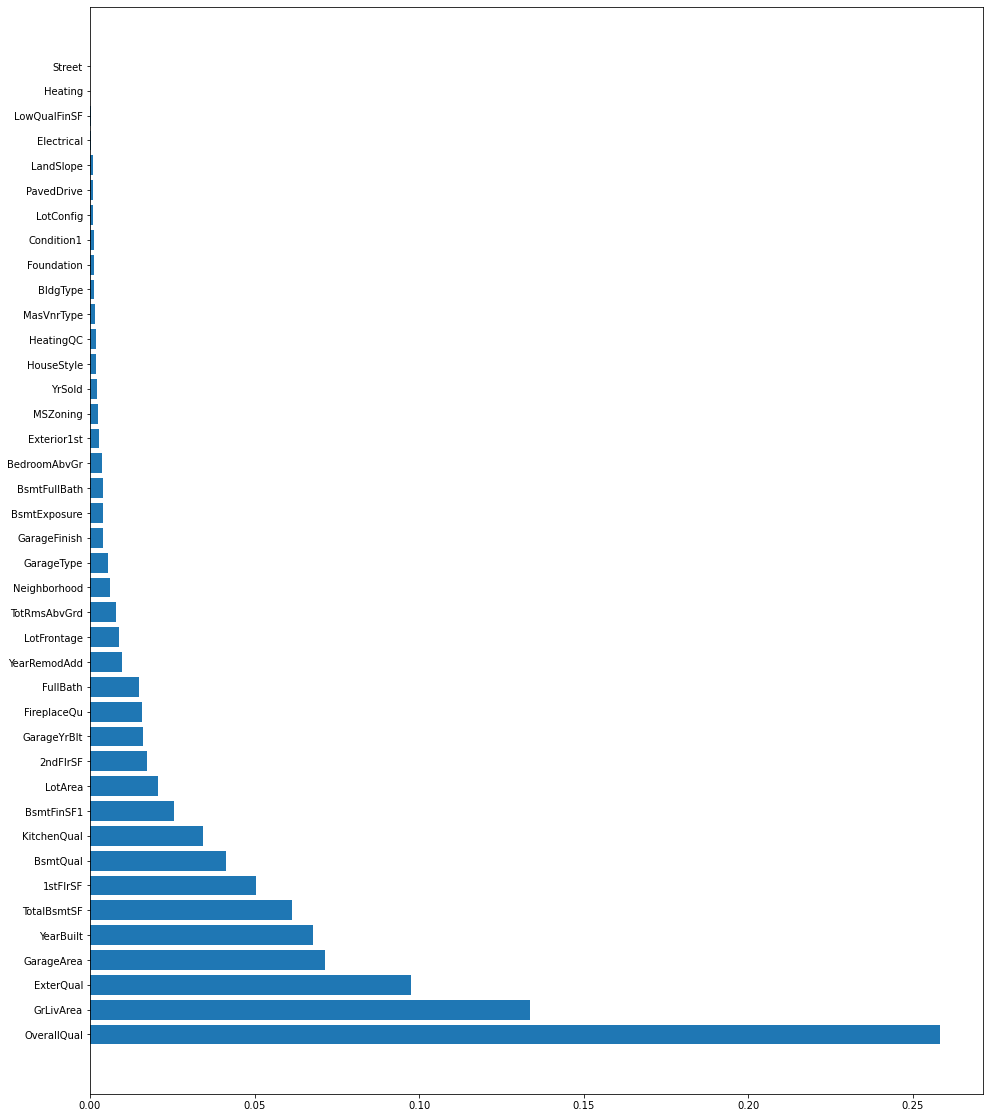

In [94]:
features, importance = zip(*sorted(feature_importance, key=lambda imp: imp[1], reverse=True))
plt.figure(figsize=(16,20))
plt.barh(features, importance)

In [95]:
features = housing_encoded.drop(['SalePrice'], axis=1)
features.head()


GrLivArea  LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  \
1        856         59.0     7890            6       1939          1950   
2       1049         42.0     4235            5       1984          1984   
3       1001         60.0     6060            5       1930          2007   
4       1039         80.0     8146            4       1900          2003   
5       1665         70.0     8400            8       2001          2001   

   BsmtFinSF1  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  \
1       238.0        856.0       856         0             0           1.0   
2       552.0       1049.0      1049         0             0           1.0   
3       737.0        837.0      1001         0             0           0.0   
4         0.0        405.0       717       322             0           0.0   
5       643.0        810.0       810       855             0           1.0   

   FullBath  BedroomAbvGr  TotRmsAbvGrd  GarageYrBlt  GarageArea  YrSold  \
1         1             2             4       1939.0       399.0    2010   
2         2             2             5       1984.0       266.0    2009   
3         1             2             5       1930.0       216.0    2007   
4         1             2             6       1940.0       281.0    2009   
5         2             3             6       2001.0       528.0    2009   

   MSZoning  Street  LotConfig  Neighborhood  Condition1  BldgType  \
1         5       1          0            21           2         0   
2         5       1          4             7           2         4   
3         1       1          4            11           2         0   
4         5       1          0            20           2         0   
5         5       1          4            17           2         0   

   HouseStyle  Exterior1st  MasVnrType  Foundation  Heating  GarageType  \
1           2           13           3           1        1           5   
2           2            6           1           1        1           1   
3           2            8           3           0        1           5   
4           5            8           3           0        1           5   
5           5           12           3           2        1           1   

   LandSlope  ExterQual  BsmtQual  BsmtExposure  HeatingQC  Electrical  \
1          1          3         4             2          3           5   
2          1          4         5             3          3           5   
3          1          4         4             2          5           5   
4          1          4         3             2          4           5   
5          1          4         5             2          5           5   

   KitchenQual  FireplaceQu  GarageFinish  PavedDrive  
1            3            5             2           3  
2            4            1             4           3  
3            4            1             2           1  
4            3            1             2           1  
5            4            1             4           3

We wanted to see if dropping the least significant features would keep the score around the same level to seek a simpler model :

In [96]:
features1 = features.drop(['Electrical','LowQualFinSF','Heating','Street'], axis=1) 
features1.shape

(2580, 36)

In [97]:
x_train = features1.iloc[train_idx]
x_test = features1.iloc[test_idx]
y_train = target.iloc[train_idx]
y_test = target.iloc[test_idx]

In [98]:
# (1)
from sklearn.ensemble import RandomForestRegressor
randomForest = RandomForestRegressor()

# fit RF model on training set 
randomForest.set_params(random_state=0)
randomForest.fit(x_train, np.ravel(y_train)) 

RandomForestRegressor(random_state=0)

In [99]:
randomForest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [100]:
print("The training R2 is: %.5f" % (randomForest.score(x_train, y_train)))
print("The test R2 is: %.5f" % (randomForest.score(x_test, y_test)))

The training R2 is: 0.98718
The test R2 is: 0.84611


In [101]:
from sklearn.ensemble import RandomForestRegressor
randomForest = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11, max_features=14, n_estimators=490)

# fit RF model on training set 
randomForest.set_params(random_state=0)
randomForest.fit(x_train, np.ravel(y_train)) 

RandomForestRegressor(max_depth=11, max_features=14, n_estimators=490,
                      random_state=0)

In [102]:
print("The training R2 is: %.5f" % (randomForest.score(x_train, y_train)))
print("The test R2 is: %.5f" % (randomForest.score(x_test, y_test)))

#training 0.98275
#test 0.86345 

The training R2 is: 0.98312
The test R2 is: 0.86114


#BECAUSE REMOVING THE LEAST IMPORTANT 4 FEATURES LOWERED R2 SCORES, WE DECIDE TO KEEP ALL 40 FEATURES 

In [104]:
x_train = features.iloc[train_idx]
x_test = features.iloc[test_idx]
y_train = target.iloc[train_idx]
y_test = target.iloc[test_idx]

In [105]:
actual_y = y_test

In [106]:
from sklearn.ensemble import RandomForestRegressor
randomForestPlot = RandomForestRegressor(
    bootstrap=True, criterion='mse', max_depth=11, max_features=14, n_estimators=490)

# fit RF model on training set 
randomForestPlot.set_params(random_state=0)
randomForestPlot.fit(x_train, np.ravel(y_train))

RandomForestRegressor(max_depth=11, max_features=14, n_estimators=490,
                      random_state=0)

In [107]:
randomForestPlot.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 11,
 'max_features': 14,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 490,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [108]:
#Predicted Price from test dataset w.r.t Random Forest Regression
predict_y = randomForestPlot.predict((x_test))

In [109]:
predict_y=pd.DataFrame(predict_y)
type(predict_y)

pandas.core.frame.DataFrame

In [110]:
actual_y=pd.DataFrame(actual_y)
type(actual_y)

pandas.core.frame.DataFrame

In [111]:
actual_y=actual_y.reset_index()

In [112]:
actual_y=actual_y.drop("index", axis=1)

In [113]:
actual_y.head()

SalePrice
0     173000
1     115000
2     172500
3     155000
4     124500

Here we plot the actual house prices against our predicted house prices to visualize our work:

In [114]:
splot = pd.concat([actual_y, predict_y], axis=1)

splot.columns = ['actual house price', 'predicted house price']
splot.head()

actual house price  predicted house price
0              173000          165825.226715
1              115000          103980.418463
2              172500          167562.956895
3              155000          156788.312176
4              124500          111508.772083

<AxesSubplot:xlabel='actual house price', ylabel='predicted house price'>

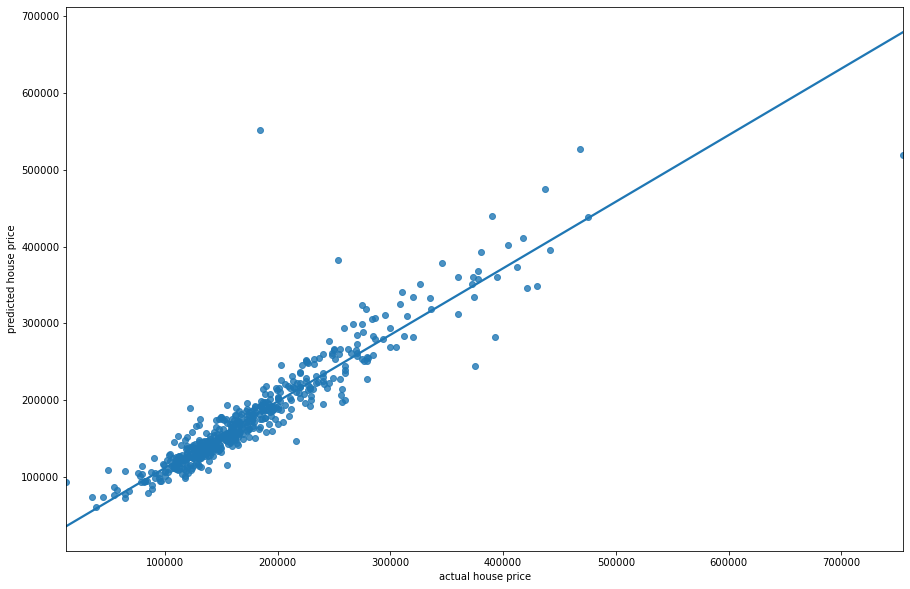

In [128]:
f, ax = plt.subplots(figsize=(15, 10))
sns.regplot(x='actual house price', y='predicted house price', data=splot, ax=ax, ci=None)

Here we calculate the Root Mean Squared Error RMSE based on the predicted vs actual values to find that on average our model predicts within a range of $28,464 to the actual price.

In [117]:
import math
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(actual_y, predict_y)
rmse = math.sqrt(mse) 
print(rmse) 

28464.03089489709


In [118]:
housing.SalePrice.mean()

178059.62325581396

Expressing the RMSE in % format:

In [119]:
28464.03/178059.62*100

15.985673787240476